Colonnes — signification simple

ZN : proportion de terrains résidentiels zonés pour des lots de plus de 25 000 sq.ft (indique des zones avec grandes parcelles).

INDUS : proportion de terrains occupés par des activités non-commerciales au détail (zones industrielles).

CHAS : variable binaire (dummy) — 1 si le secteur borde la rivière Charles, 0 sinon.

NOX : concentration d’oxydes d’azote (pollution) — mesurée en parties par 10 millions ; valeur plus élevée = plus de pollution.

RM : nombre moyen de pièces (rooms) par logement — indicateur direct de taille du logement.

AGE : part des logements occupés par leur propriétaire construits avant 1940 (pourcentage) — mesure de l’ancienneté du parc immobilier.

DIS : distance pondérée (distance “harmonisée”) aux cinq centres d’emploi de Boston — mesure d’accessibilité à l’emploi.

RAD : indice d’accessibilité aux autoroutes radiales (plus la valeur est grande, meilleure l’accessibilité routière).

TAX : taux d’imposition foncière (full-value property-tax rate) par tranche de 10 000$ — indicateur fiscal local.

PTRATIO : ratio élèves/professeur dans la ville (pupil-teacher ratio) — proxy pour la qualité des écoles.

B : transformée 1000*(Bk - 0.63)^2 où Bk est la proportion de population noire par ville ; c’est une variable démographique transformée.

LSTAT : pourcentage de la population « lower status » (statut socio-économique bas) — souvent corrélé négativement au prix des logements.

MEDV : cible — valeur médiane des logements occupés par leur propriétaire (en milliers de dollars, $1000s).

Importations

In [9]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
from dotenv import load_dotenv


In [6]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
load_dotenv()
data = pd.read_csv(os.getenv('data_path'), header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [ ]:

print(data.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [16]:
# Quelques rectification en arabe 

data_arabe = data.copy()
column_translations = {
    "CRIM": "معدل الجريمة لكل ساكن",
    "ZN": "نسبة الأراضي السكنية للمساحات الكبيرة (>25000 قدم مربع)",
    "INDUS": "نسبة الأراضي المستخدمة للأغراض الصناعية",
    "CHAS": "متغير ثنائي — 1 إذا كان القطاع يحد نهر تشارلز، 0 خلاف ذلك",
    "NOX": "تركيز أكاسيد النيتروجين (التلوث) بالأجزاء في عشرة ملايين",
    "RM": "متوسط عدد الغرف لكل وحدة سكنية",
    "AGE": "نسبة الوحدات المملوكة لأصحابها والمبنية قبل عام 1940",
    "DIS": "المسافة الموزونة للمراكز الخمسة للتوظيف في بوسطن",
    "RAD": "مؤشر الوصولية إلى الطرق السريعة الشعاعية",
    "TAX": "معدل الضريبة العقارية (لكل 10000$)",
    "PTRATIO": "نسبة الطلاب إلى المعلمين في المدينة",
    "B": "1000*(Bk - 0.63)^2 حيث Bk هي نسبة السكان السود في المدينة",
    "LSTAT": "نسبة السكان ذوي الوضع الاجتماعي والاقتصادي المنخفض",
    "MEDV": "القيمة الوسيطية للوحدات السكنية المملوكة (بالألف دولار)"
}
data_arabe.rename(columns=column_translations, inplace=True)

print(data_arabe.describe())

       معدل الجريمة لكل ساكن  \
count             506.000000   
mean                3.613524   
std                 8.601545   
min                 0.006320   
25%                 0.082045   
50%                 0.256510   
75%                 3.677083   
max                88.976200   

       نسبة الأراضي السكنية للمساحات الكبيرة (>25000 قدم مربع)  \
count                                         506.000000         
mean                                           11.363636         
std                                            23.322453         
min                                             0.000000         
25%                                             0.000000         
50%                                             0.000000         
75%                                            12.500000         
max                                           100.000000         

       نسبة الأراضي المستخدمة للأغراض الصناعية  \
count                               506.000000   
mean            

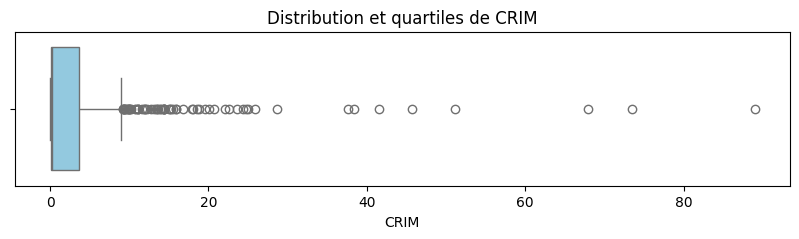

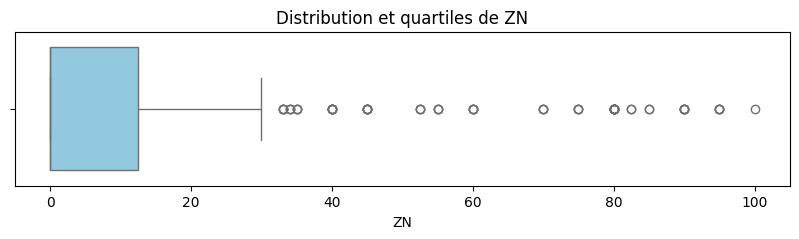

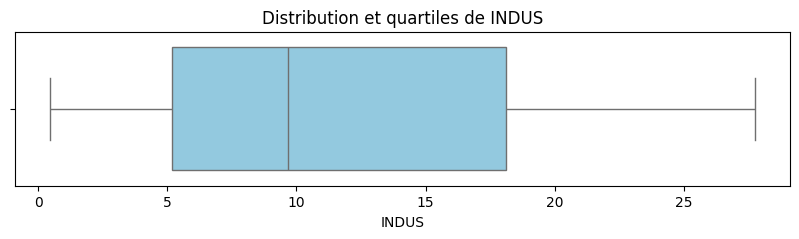

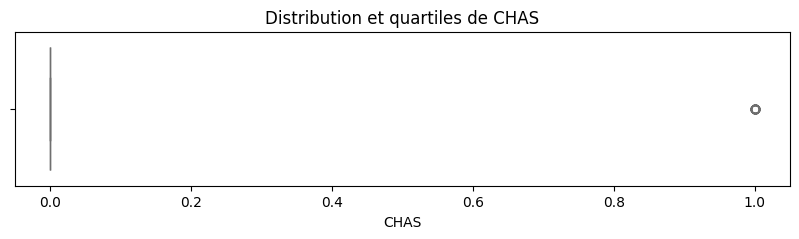

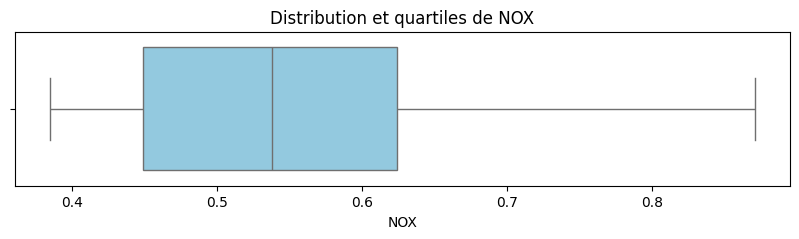

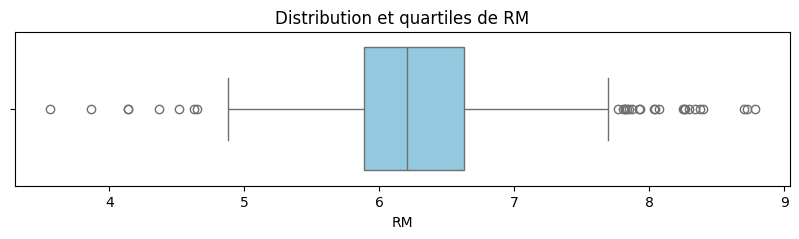

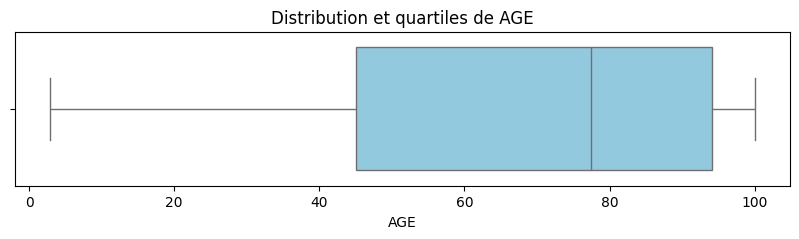

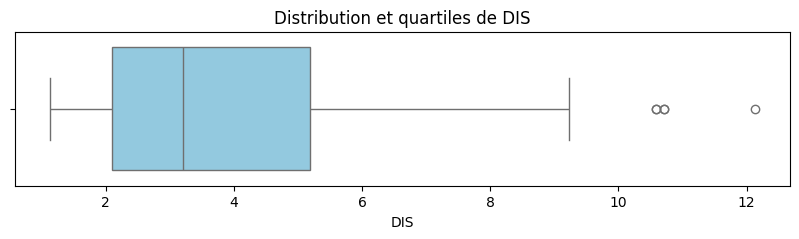

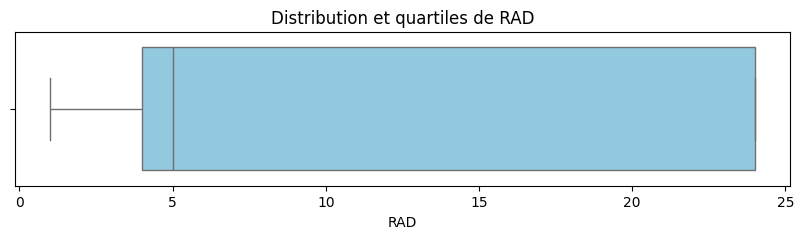

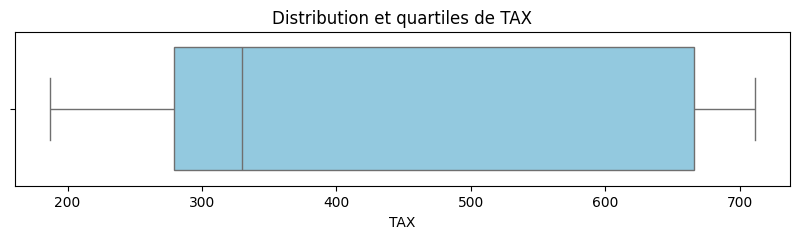

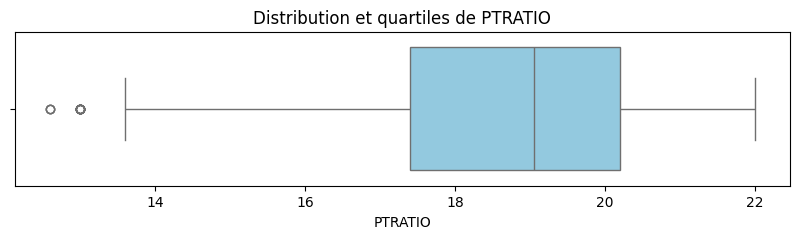

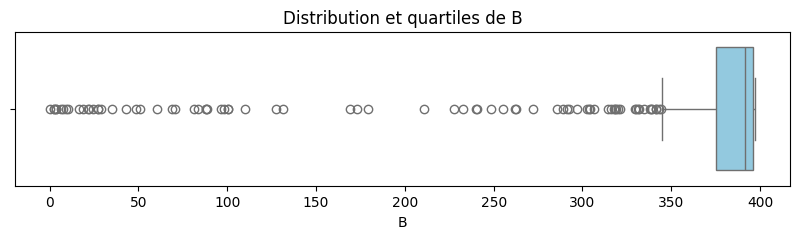

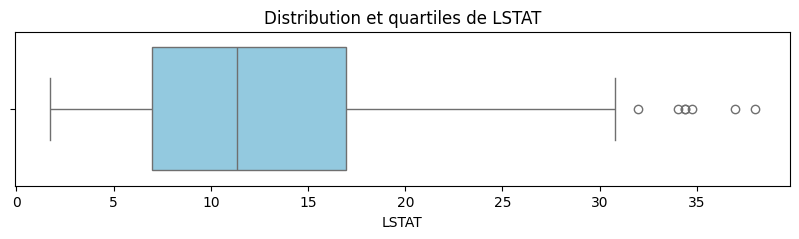

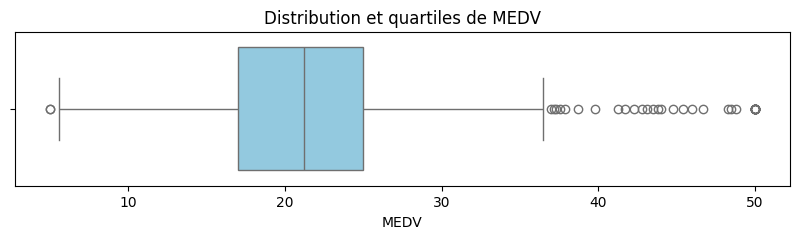

In [ ]:
for col in data.columns:
    plt.figure(figsize=(10, 2))  
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(f'Distribution et quartiles de {col}')
    plt.show()
